<a href="https://colab.research.google.com/github/pedroogaab/NotesRead/blob/main/NoteReader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git
!pip install paddleocr
!pip install paddlepaddle

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 46761, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 46761 (delta 2), reused 0 (delta 0), pack-reused 46754
Receiving objects: 100% (46761/46761), 342.77 MiB | 32.14 MiB/s, done.
Resolving deltas: 100% (33011/33011), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.9/445.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 115.8 MB/s eta 0:00:00
     ━━━━━━━━

In [3]:
!wget http://nz2.archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb

--2023-07-31 19:40:11--  http://nz2.archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb
Resolving nz2.archive.ubuntu.com (nz2.archive.ubuntu.com)... 91.189.91.81, 185.125.190.39, 91.189.91.83, ...
Connecting to nz2.archive.ubuntu.com (nz2.archive.ubuntu.com)|91.189.91.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1321244 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  5.81MB/s    in 0.2s    

2023-07-31 19:40:11 (5.81 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb’ saved [1321244/1321244]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 120493 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.19) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.19) ...
debconf: unable to initialize fronten

In [24]:
from re import X
from paddleocr import PaddleOCR, draw_ocr
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def noteRead(img, frases=[]):

  img_open = cv2.imread(img)

  ocr = PaddleOCR(use_angle_cls=True, lang='pt')
  result = ocr.ocr(img_open, cls=True)

  text_lines = []
  boxes = []

  text_lines_sec = []
  boxes_sec = []

  coord = []
  for f in frases:
    frase = f.upper()
    frase = frase.replace(" ","")

    for res in result:
        for line in res:
          line_plus = line[1][0].upper().replace(" ", "")
          line_plus = line_plus[:len(frase)]

          if  line_plus == frase:
            coord.append({line[1][0]:line[0]})
            text_lines.append(line[1][0])
            boxes.append(line[0])

  for comp in coord:
    produto = next(iter(comp.keys()))
    coordenada = comp[produto]


    print(coordenada)
    xy_min = coordenada[0]
    xy_max = coordenada[2]

    print(xy_min, xy_max)

    print(f"\n\nCOORDENADA DO CAMPO ({produto}) {xy_min, xy_max}\n")
    for l in result:

      for axis in l:

        _xy_min = axis[0][0]
        _xy_max = axis[0][2]



        compara_min = xy_min[1] / _xy_min[1]
        compara_max = xy_max[1] / _xy_max[1]

        diferente = False
        if xy_min[0] != _xy_min[0] and xy_max[0] != _xy_max[0] and xy_min[0] < _xy_min[0] and xy_max[0] < _xy_max[0]:
          diferente = True

        if (compara_min >= 0.99 and compara_min <= 1.01) and (compara_max >= 0.99 and compara_max <= 1.01) and diferente == True:
          print(f"ACHOU, CAMPO ({axis[1][0]}), Coordenada {_xy_min, _xy_max}")
          text_lines_sec.append(axis[1][0])
          boxes_sec.append(axis[0])



  num_boxes = len(boxes)
  boxes = np.array(boxes).reshape(num_boxes, 4, 2).astype(np.int64)

  num_boxes_sec = len(boxes_sec)
  boxes_sec = np.array(boxes_sec).reshape(num_boxes_sec, 4, 2).astype(np.int64)

  all_boxes = np.concatenate((boxes, boxes_sec), axis=0)
  all_texts = np.concatenate((text_lines, text_lines_sec), axis=0)

  # Draw result for all boxes
  image_with_text = draw_ocr(img_open, all_boxes, all_texts, font_path="/content/PaddleOCR/StyleText/fonts/en_standard.ttf")

  # Display the image with bounding boxes and recognized text for all boxes
  cv2_imshow(image_with_text)
  cv2.waitKey(0)
  cv2.destroyAllWindows()


[2023/08/01 01:06:19] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr

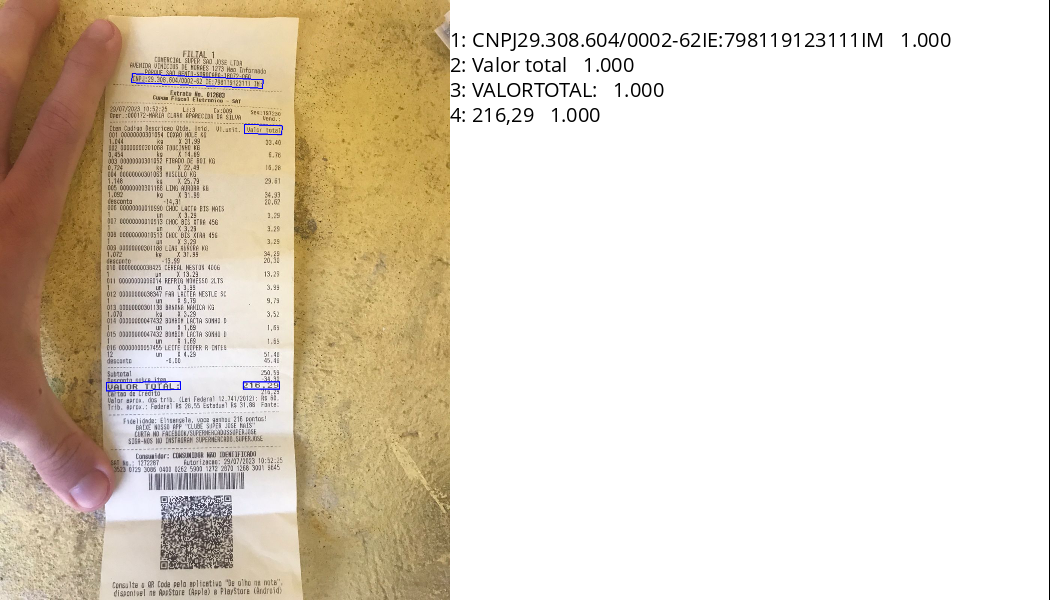

In [25]:
img = "/content/drive/MyDrive/notes/note1.jpg"
frases = ["CNPJ", "VALOR TOTAL"]
noteRead(img, frases)
